In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


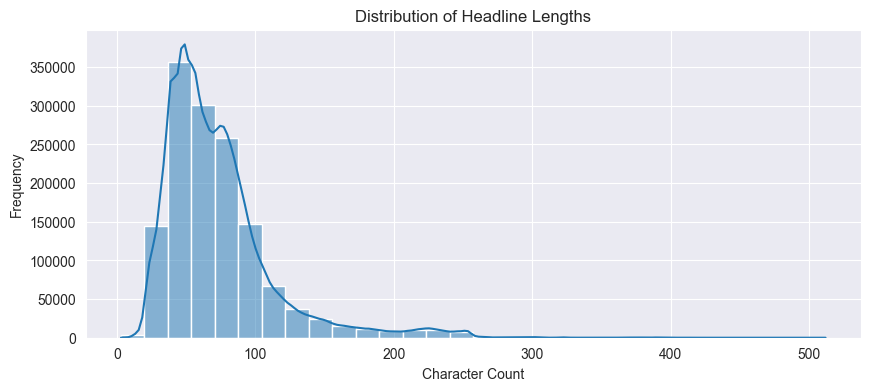

In [14]:
# Load the dataset
df = pd.read_csv("../data/raw_analyst_ratings.csv")
df.head()
# Descriptive Statistics
df["headline_length"] = df["headline"].astype(str).str.len()
print(df["headline_length"].describe())
# Plot
plt.figure(figsize=(10, 4))
sns.histplot(df["headline_length"], bins=30, kde=True)
plt.title("Distribution of Headline Lengths")
plt.xlabel("Character Count")
plt.ylabel("Frequency")
plt.show()

In [4]:
# Articles Per Publisher
top_publishers = df["publisher"].value_counts().head(10)
print(top_publishers)
# Convert 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.dropna(subset=['date'], inplace=True)
print("\n--- Publication Date Analysis ---")
df['publication_day_of_week'] = df['date'].dt.day_name()
df['publication_hour'] = df['date'].dt.hour
df['publication_month'] = df['date'].dt.month_name()
df['publication_year'] = df['date'].dt.year

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64

--- Publication Date Analysis ---


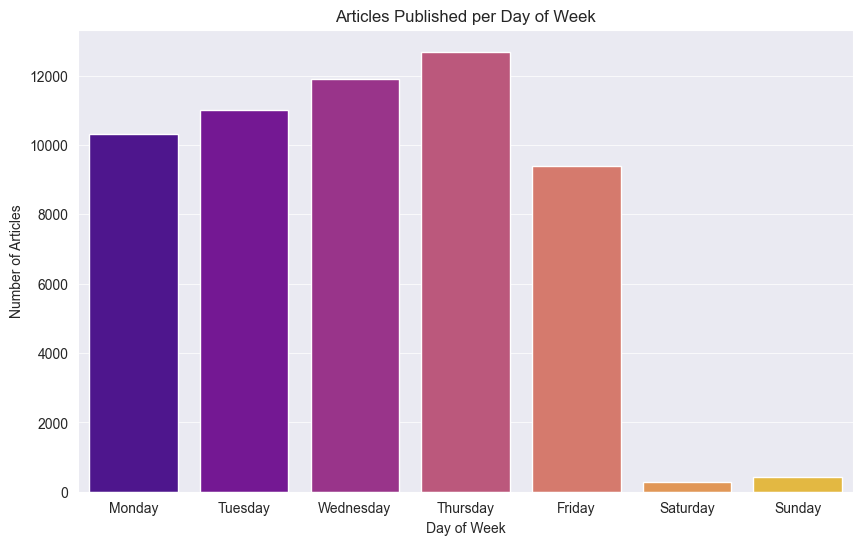

In [6]:
# Count articles per day
articles_per_day = df['publication_day_of_week'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Convert to DataFrame for plotting
articles_df = articles_per_day.reset_index()
articles_df.columns = ['Day', 'Count']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=articles_df, x='Day', y='Count', hue='Day', palette='plasma', legend=False)
plt.title('Articles Published per Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Articles')
plt.grid(axis='y', alpha=0.75)
plt.show()

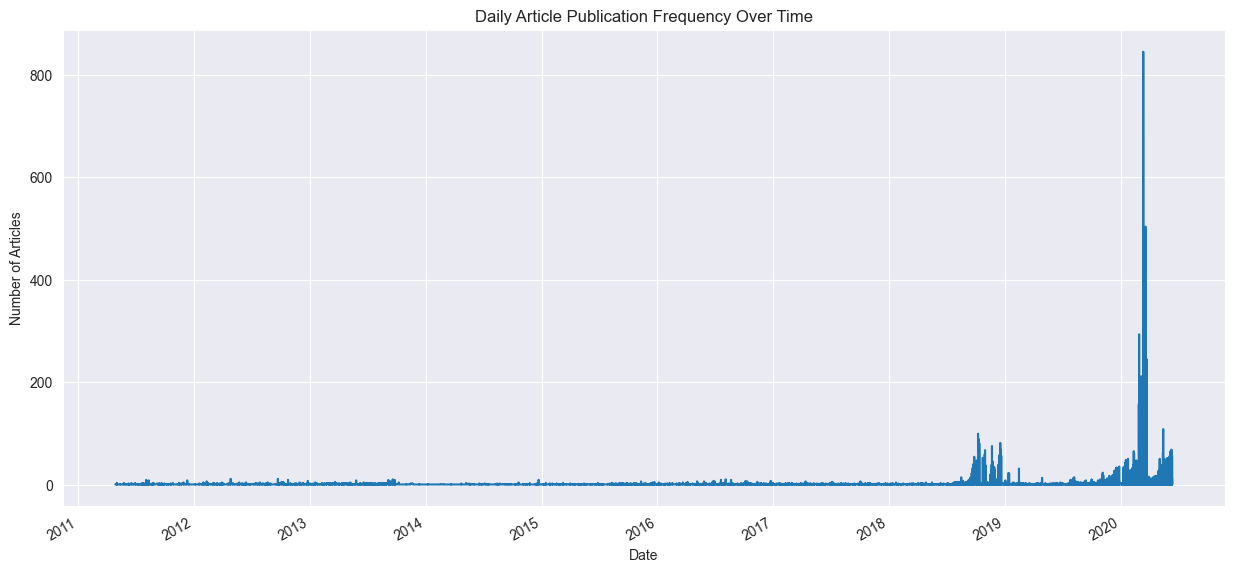

In [7]:
# Articles over time (daily frequency)
articles_daily_count = df['date'].value_counts().sort_index()

plt.figure(figsize=(15, 7))
articles_daily_count.plot(kind='line')
plt.title('Daily Article Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

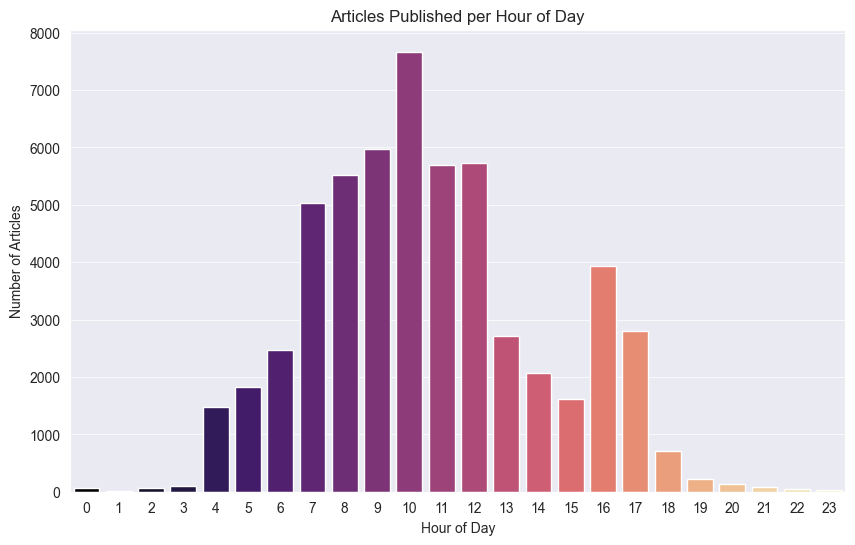

In [9]:
 # Articles per hour of day
articles_per_hour = df['publication_hour'].value_counts().sort_index()

# Convert to DataFrame
hour_df = articles_per_hour.reset_index()
hour_df.columns = ['Hour', 'Count']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=hour_df, x='Hour', y='Count', hue='Hour', palette='magma', legend=False)
plt.title('Articles Published per Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Articles')
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.75)
plt.show()



--- Publication Date Analysis ---


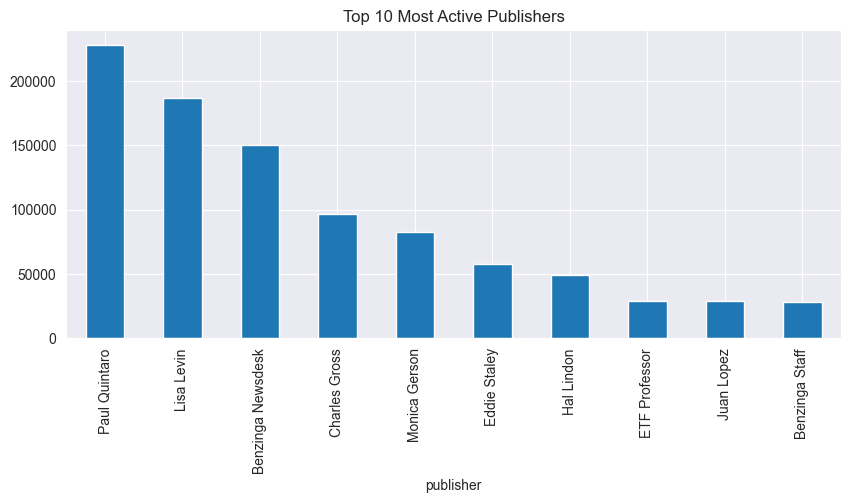

In [10]:
# Top 10 Publishers Bar Plot

top_publishers.plot(kind="bar", figsize=(10, 4), title="Top 10 Most Active Publishers")
print("\n--- Publication Date Analysis ---")
df['publication_day_of_week'] = df['date'].dt.day_name()
df['publication_hour'] = df['date'].dt.hour
df['publication_month'] = df['date'].dt.month_name()
df['publication_year'] = df['date'].dt.year